In [50]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline


In [51]:
df = pd.read_csv("2017_jun_final_EN.csv")
df.head()



,N,Role,Programming language,Specialisation,Experience,Experience on current job,Salary/month,Изменение.зарплаты.за.12.месяцев,City,Company size,...,Still student,English,Subject.area,Date,User.Agent,exp,current_job_exp,salary,Валюта,cls
0,1,Junior QA engineer,NaN,Manual QA,0.5,0.5,400,0,New York,up to 10 employees,...,True,A1,"iOS,eCommerce",12/06/2017 12:38:08,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,0.5,0.5,400,NaN,QA
1,2,Junior QA engineer,NaN,Manual QA,loss then 3 month,loss then 3 month,430,130,New York,more then 1000 employees,...,True,B2,Web development,12/06/2017 12:42:51,Mozilla/5.0 (iPad; CPU OS 10_2_1 like Mac OS X...,0.0,0.0,430,NaN,QA
2,3,Software Engineer,C#/.NET,NaN,4,1,2500,800,Berlin,up to 1000 employees,...,False,B1,"Web development,Corporative systems",12/06/2017 13:02:47,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,4.0,1.0,2500,NaN,DEV
3,4,Software Engineer,JavaScript,NaN,5,4,2000,400,Odesa,up to 200 employees,...,False,A1,"Desktop Applications,Web development",12/06/2017 13:03:01,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,5.0,4.0,2000,NaN,DEV
4,5,Senior Software Engineer,JavaScript,NaN,10+,0.5,4500,500,Other,up to 10 employees,...,False,B1,"Desktop Applications,Web development",12/06/2017 13:03:47,Mozilla/5.0 (iPhone; CPU iPhone OS 10_3_2 like...,10.0,0.5,4500,NaN,DEV


In [52]:
(n_rows, n_columns) = df.shape
print(f"number of rows = {n_rows}\nnumber of columns = {n_columns}")


number of rows = 8704
number of columns = 25


In [53]:
data_types = df.dtypes
print(data_types)

N                                     int64
Role                                 object
Programming language                 object
Specialisation                       object
Experience                           object
Experience on current job            object
Salary/month                          int64
Изменение.зарплаты.за.12.месяцев      int64
City                                 object
Company size                         object
Company type                         object
Gender                               object
Age                                   int64
Education                            object
University                           object
Still student                          bool
English                              object
Subject.area                         object
Date                                 object
User.Agent                           object
exp                                 float64
current_job_exp                     float64
salary                          

In [54]:
spaces = []


for column in df.columns:
    spaces.append(df[column].isnull().sum())

spaces_proportions = np.array(spaces)/n_rows
print(f"spaces = {spaces} \nspaces proporstions = {spaces_proportions}")



spaces = [0, 0, 3850, 7219, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1546, 0, 0, 223, 0, 0, 0, 0, 0, 8694, 1574] 
spaces proporstions = [0.         0.         0.44232537 0.82938879 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.17761949 0.         0.         0.0256204
 0.         0.         0.         0.         0.         0.9988511
 0.1808364 ]


In [55]:
i = -1

new_df = df.copy()

for column in df.columns:
    i+=1
    if column == "Programming language":
        continue

    if spaces[i] != 0:
        new_df = new_df.drop(columns=column)

new_df.head()


,N,Role,Programming language,Experience,Experience on current job,Salary/month,Изменение.зарплаты.за.12.месяцев,City,Company size,Company type,Gender,Age,Education,Still student,English,Date,User.Agent,exp,current_job_exp,salary
0,1,Junior QA engineer,NaN,0.5,0.5,400,0,New York,up to 10 employees,Outsourcing,female,20,Unfinished Higher education,True,A1,12/06/2017 12:38:08,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,0.5,0.5,400
1,2,Junior QA engineer,NaN,loss then 3 month,loss then 3 month,430,130,New York,more then 1000 employees,Outsourcing,female,21,Unfinished Higher education,True,B2,12/06/2017 12:42:51,Mozilla/5.0 (iPad; CPU OS 10_2_1 like Mac OS X...,0.0,0.0,430
2,3,Software Engineer,C#/.NET,4,1,2500,800,Berlin,up to 1000 employees,Outsourcing,male,26,Higher education,False,B1,12/06/2017 13:02:47,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,4.0,1.0,2500
3,4,Software Engineer,JavaScript,5,4,2000,400,Odesa,up to 200 employees,product,male,30,Secondary education,False,A1,12/06/2017 13:03:01,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,5.0,4.0,2000
4,5,Senior Software Engineer,JavaScript,10+,0.5,4500,500,Other,up to 10 employees,product,male,30,Secondary education,False,B1,12/06/2017 13:03:47,Mozilla/5.0 (iPhone; CPU iPhone OS 10_3_2 like...,10.0,0.5,4500


In [56]:
new_spaces = []


for column in new_df.columns:
    new_spaces.append(new_df[column].isnull().sum())

new_spaces_proportions = np.array(new_spaces)/n_rows
print(f"new spaces = {new_spaces} \nnew spaces proporstions = {new_spaces_proportions}")

new spaces = [0, 0, 3850, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 
new spaces proporstions = [0.         0.         0.44232537 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.        ]


In [57]:
df = df.dropna()
df.shape
df.head()


,N,Role,Programming language,Specialisation,Experience,Experience on current job,Salary/month,Изменение.зарплаты.за.12.месяцев,City,Company size,...,Still student,English,Subject.area,Date,User.Agent,exp,current_job_exp,salary,Валюта,cls


In [58]:
bool_vec = new_df["Programming language"] == "Python"
python_data = new_df[bool_vec]
python_data.head()

,N,Role,Programming language,Experience,Experience on current job,Salary/month,Изменение.зарплаты.за.12.месяцев,City,Company size,Company type,Gender,Age,Education,Still student,English,Date,User.Agent,exp,current_job_exp,salary
12,13,Software Engineer,Python,1,loss then 3 month,800,200,Berlin,up to 50 employees,Outsourcing,male,26,Higher education,False,A1,12/06/2017 13:05:54,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,1.0,0.0,800
68,69,Software Engineer,Python,1.5,0.5,900,900,Berlin,up to 10 employees,start up,male,21,Unfinished Higher education,True,B2,12/06/2017 13:11:17,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,1.5,0.5,900
87,88,Junior Software Engineer,Python,0.5,0.5,600,0,Berlin,up to 10 employees,Outsourcing,male,19,Unfinished Higher education,True,B2,12/06/2017 13:12:25,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,0.5,0.5,600
114,115,Junior Software Engineer,Python,1.5,0.5,685,250,Berlin,up to 1000 employees,Outsourcing,male,21,Unfinished Higher education,False,B1,12/06/2017 13:14:52,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,1.5,0.5,685
143,144,Junior Software Engineer,Python,1,1,750,250,Berlin,up to 10 employees,Outsourcing,male,21,Unfinished Higher education,True,B2,12/06/2017 13:19:10,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,1.0,1.0,750


In [59]:
(pyth_n_rows, pyth_n_col) = python_data.shape

print(f"number of rows = {pyth_n_rows}\nnumber of columns = {pyth_n_col}")

number of rows = 207
number of columns = 20


In [60]:
python_data_grouped_by_role = python_data.groupby("Role").agg({'Salary/month': ['min', 'max']})

role = list(python_data_grouped_by_role.index)
salary_min = list(python_data_grouped_by_role[("Salary/month", "min")])
salary_max = list(python_data_grouped_by_role[("Salary/month", "max")])

python_by_role = pd.DataFrame(
    {
        "Role": role,
        "Min salary/month": salary_min,
        "Max salary/month": salary_max

}
)

python_by_role.head()


,Role,Min salary/month,Max salary/month
0,Junior Software Engineer,100,1250
1,Senior Software Engineer,1300,9200
2,Software Engineer,500,5400
3,System Architect,3000,5000
4,Technical Lead,1425,6200


In [61]:
def fill_avg_salary(n):
    avg = sum(n)/len(n)
    return avg



In [62]:
# python_data_grouped_by_role['Salary/month - avg'] = python_data_grouped_by_role.apply(fill_avg_salary, axis=1)
# python_data_grouped_by_role.head()

# python_by_role["Avg salary/month"] = 
avg_salary = python_data.groupby("Role")["Salary/month"].apply(fill_avg_salary)
python_by_role["Avg salary/month"] = list(avg_salary)

In [63]:
python_by_role.head()

,Role,Min salary/month,Max salary/month,Avg salary/month
0,Junior Software Engineer,100,1250,560.841270
1,Senior Software Engineer,1300,9200,3387.096774
2,Software Engineer,500,5400,1799.070000
3,System Architect,3000,5000,4000.000000
4,Technical Lead,1425,6200,3165.909091


In [64]:
python_by_role.to_csv("python_by_role.csv")

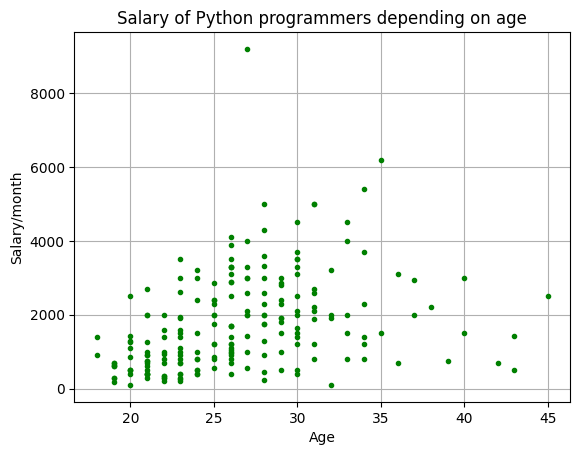

In [65]:
plt.plot(python_data["Age"], python_data["Salary/month"], "g.")
plt.ylabel("Salary/month")
plt.xlabel("Age")
plt.title("Salary of Python programmers depending on age")
plt.grid(visible=True)

{'A1': 32, 'B2': 79, 'B1': 77, 'С1': 19}


Text(0.5, 1.0, 'English level of Python programmers')

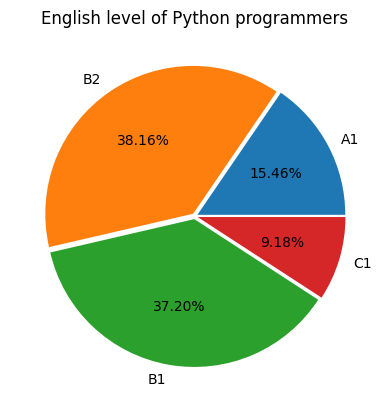

In [66]:
english_dict = {}

for item in python_data["English "]:
    if item in english_dict.keys():
        english_dict[item] += 1
    else:
        english_dict[item] = 1

print(english_dict)

labels = list(english_dict.keys())
data = list(english_dict.values())

explode = list(np.ones(len(data))*0.02)


plt.pie(x=data, labels=labels, autopct="%.2f%%", explode=explode)
plt.title("English level of Python programmers")

Text(0.5, 1.0, 'Education level of Python programmers')

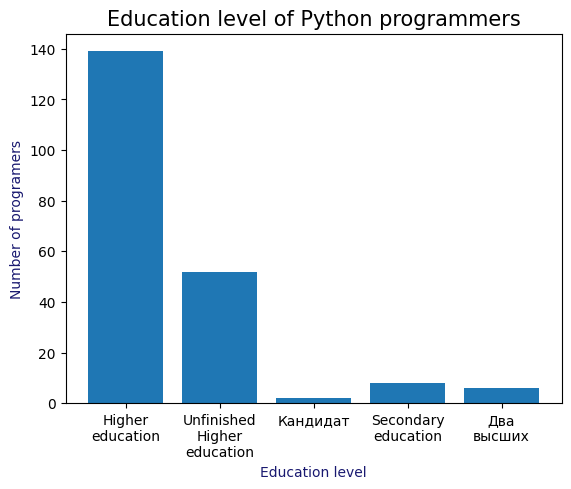

In [67]:
education_dict = {}

for item in python_data["Education"]:
    item = item.replace(" ", "\n")
    if item in education_dict.keys():
        education_dict[item] += 1
    else:
        education_dict[item] = 1

plt.bar(
    list(education_dict.keys()),
    list(education_dict.values()),
)

plt.xlabel("Education level", fontsize=10, color="midnightblue")
plt.ylabel("Number of programers", fontsize=10, color="midnightblue")
plt.title("Education level of Python programmers", fontsize=15)



Text(0.5, 1.0, 'Python programmers salary depending on role')

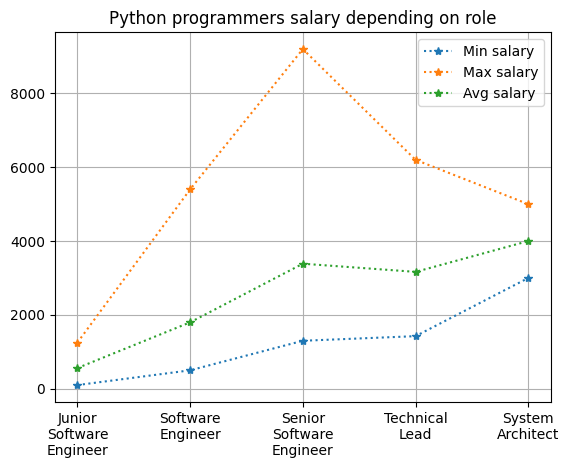

In [83]:
data = python_by_role.sort_values(by="Min salary/month")

x_data = []
for role in data["Role"]:
    x_data.append(role.replace(" ", "\n"))

plt.plot(x_data, data["Min salary/month"],"*:")
plt.plot(x_data, data["Max salary/month"],"*:")
plt.plot(x_data, data["Avg salary/month"],"*:")
plt.grid(visible=True)
plt.legend(["Min salary", "Max salary", "Avg salary"])
plt.title("Python programmers salary depending on role")
